In [1]:
import pandas as pd
from pandas import DataFrame
import random as rm
import numpy as np
import time
import networkx as nx
import pickle
import datetime
from datetime import timedelta
import scipy.stats
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mdates

In [2]:
filename="/home/mathsys1/Documents/MathSys/Network_rail_data_analysis/20191001Df.pickle"
pickle_in=open(filename,"rb")
Df=pickle.load(pickle_in)
#filename="/home/mathsys1/Documents/MathSys/Network_rail_data_analysis/20191002Df.pickle"
#pickle_in=open(filename,"rb")
#Df1=pickle.load(pickle_in)
#filename="/home/mathsys1/Documents/MathSys/Network_rail_data_analysis/20191003Df.pickle"
#pickle_in=open(filename,"rb")
#Df2=pickle.load(pickle_in)
#filename="/home/mathsys1/Documents/MathSys/Network_rail_data_analysis/20191004Df.pickle"
#pickle_in=open(filename,"rb")
#Df3=pickle.load(pickle_in)
#filename="/home/mathsys1/Documents/MathSys/Network_rail_data_analysis/20191005Df.pickle"
#pickle_in=open(filename,"rb")
#Df4=pickle.load(pickle_in)
#Df=Df.append(Df1)
#Df=Df.append(Df2)
#Df=Df.append(Df3)
#Df=Df.append(Df4)
Df

,Area,From,To,Headcode,TIPLOC,Offset,Sched,Delay,NewUTC,AdjUTC
0,UR,0344,0342,2D01,THOPBAY,-41,2019-10-01 04:06:00,0 days 00:00:04,2019-10-01 04:06:45,2019-10-01 04:06:04
1,UR,0342,0340,2D01,UR,0,2019-10-01 04:07:16,0 days 00:00:00,2019-10-01 04:07:16,2019-10-01 04:07:16
2,UR,0340,0338,2D01,STHNDE,35,2019-10-01 04:08:00,0 days 00:00:29,2019-10-01 04:07:54,2019-10-01 04:08:29
3,UR,0338,0336,2D01,STHNDE,-30,2019-10-01 04:08:00,0 days 00:00:50,2019-10-01 04:09:20,2019-10-01 04:08:50
4,UR,0336,0334,2D01,UR,0,2019-10-01 04:09:50,0 days 00:00:00,2019-10-01 04:09:50,2019-10-01 04:09:50
...,...,...,...,...,...,...,...,...,...,...
28934,UR,0343,0345,1D93,THOPBAY,33,2019-10-01 01:47:00,0 days 23:58:22,2019-10-02 01:44:49,2019-10-02 01:45:22
28935,UR,0345,0349,1D93,THOPBAY,-32,2019-10-01 01:47:00,0 days 23:58:45,2019-10-02 01:46:17,2019-10-02 01:45:45
28936,UR,0349,0351,1D93,UR,0,2019-10-02 01:46:49,0 days 00:00:00,2019-10-02 01:46:49,2019-10-02 01:46:49
28937,UR,0351,0353,1D93,UR,0,2019-10-02 01:47:08,0 days 00:00:00,2019-10-02 01:47:08,2019-10-02 01:47:08


In [3]:
Train=Df[Df['Headcode']=='2D01'].reset_index(drop=True)
Train2=Df[Df['Headcode']=='2B51'].reset_index(drop=True)
#Train=Train[Train['TIPLOC']!='UR'].reset_index(drop=True)
Train2

,Area,From,To,Headcode,TIPLOC,Offset,Sched,Delay,NewUTC,AdjUTC
0,UR,C596,A596,2B51,UR,0,2019-10-01 04:12:44,0 days 00:00:00,2019-10-01 04:12:44,2019-10-01 04:12:44
1,UR,A596,0352,2B51,SHBRYNS,-36,2019-10-01 04:15:00,0 days 00:00:00,2019-10-01 04:15:36,2019-10-01 04:15:00
2,UR,0352,0350,2B51,UR,0,2019-10-01 04:16:57,0 days 00:00:00,2019-10-01 04:16:57,2019-10-01 04:16:57
3,UR,0350,0348,2B51,UR,0,2019-10-01 04:17:29,0 days 00:00:00,2019-10-01 04:17:29,2019-10-01 04:17:29
4,UR,0348,0344,2B51,THOPBAY,33,2019-10-01 04:18:00,0 days 00:00:28,2019-10-01 04:17:55,2019-10-01 04:18:28
...,...,...,...,...,...,...,...,...,...,...
94,UR,0118,0116,2B51,UR,0,2019-10-01 05:17:09,0 days 00:00:00,2019-10-01 05:17:09,2019-10-01 05:17:09
95,UR,0116,0112,2B51,UR,0,2019-10-01 05:17:27,0 days 00:00:00,2019-10-01 05:17:27,2019-10-01 05:17:27
96,UR,0112,0108,2B51,UR,0,2019-10-01 05:17:50,0 days 00:00:00,2019-10-01 05:17:50,2019-10-01 05:17:50
97,UR,0108,0106,2B51,UR,0,2019-10-01 05:18:08,0 days 00:00:00,2019-10-01 05:18:08,2019-10-01 05:18:08


In [4]:
Uniqueheadcodes=Df['Headcode'].unique()
wait=Uniqueheadcodes[0]
Uniqueheadcodes[0]=Uniqueheadcodes[1]
Uniqueheadcodes[1]=wait
len(Uniqueheadcodes)

492

In [5]:
Direction=pd.DataFrame(columns=['Headcodes','Direction','Colour'])
Direction['Headcodes']=Uniqueheadcodes
for i in range(0,len(Uniqueheadcodes)):
    Train=Df[Df['Headcode']==Uniqueheadcodes[i]].reset_index(drop=True)
    if int(Train['From'][0][3])%2==0:
        Direction.at[i,'Direction']='W'
        Direction.at[i,'Colour']='r'
    else:
        Direction.at[i,'Direction']='E'
        Direction.at[i,'Colour']='b'
Direction

,Headcodes,Direction,Colour
0,2B51,W,r
1,2D01,W,r
2,2D03,W,r
3,2R51,W,r
4,2D00,E,b
...,...,...,...
487,1D91,W,r
488,2B46,E,b
489,2T50,E,b
490,2B48,E,b


In [6]:
Train=Train[Train['TIPLOC']!='UR'].reset_index(drop=True)
TIPLOCs=Train['TIPLOC'].unique()
TIPLOCs

array(['OCKENDN', 'UPMNSTR', 'LAINDON', 'PITSEA', 'BENFLET', 'LHONSEA',
       'WCLIFF', 'STHCENT', 'STHNDE', 'THOPBAY', 'SHBRYNS'], dtype=object)

In [7]:
Train

,Area,From,To,Headcode,TIPLOC,Offset,Sched,Delay,NewUTC,AdjUTC
0,UR,0860,0858,1D93,OCKENDN,56,2019-10-01 00:59:00,0 days 23:58:33,2019-10-02 00:56:37,2019-10-02 00:57:33
1,UR,0858,0854,1D93,OCKENDN,-11,2019-10-01 00:59:00,0 days 23:58:53,2019-10-02 00:58:04,2019-10-02 00:57:53
2,UR,0540,0538,1D93,UPMNSTR,0,2019-10-01 01:09:00,0 days 23:54:46,2019-10-02 01:03:46,2019-10-02 01:03:46
3,UR,0213,0217,1D93,UPMNSTR,-27,2019-10-01 01:09:00,1 days 00:01:22,2019-10-02 01:10:49,2019-10-02 01:10:22
4,UR,0251,0253,1D93,LAINDON,50,2019-10-01 01:16:00,1 days 00:01:55,2019-10-02 01:17:05,2019-10-02 01:17:55
5,UR,0253,0255,1D93,LAINDON,-15,2019-10-01 01:16:00,1 days 00:01:21,2019-10-02 01:17:36,2019-10-02 01:17:21
6,UR,0273,0275,1D93,PITSEA,49,2019-10-01 01:27:00,0 days 23:54:53,2019-10-02 01:21:04,2019-10-02 01:21:53
7,UR,0275,0279,1D93,PITSEA,-14,2019-10-01 01:27:00,0 days 23:55:31,2019-10-02 01:22:45,2019-10-02 01:22:31
8,UR,0285,0287,1D93,BENFLET,48,2019-10-01 01:30:00,0 days 23:55:35,2019-10-02 01:24:47,2019-10-02 01:25:35
9,UR,0287,0289,1D93,BENFLET,-30,2019-10-01 01:30:00,0 days 23:55:58,2019-10-02 01:26:28,2019-10-02 01:25:58


In [8]:
def Train_timings(Df,Headcode):
    Train=Df[Df['Headcode']==Headcode].reset_index(drop=True)
    Train=Train[Train['TIPLOC']!='UR'].reset_index(drop=True)
    TIPLOCs=Train['TIPLOC'].unique()
    Time=[]
    for i in range(0,len(TIPLOCs)):
        for j in range(0,len(Train)):
            if Train['TIPLOC'][j]==TIPLOCs[i]:
                #Time=Time+[str(Train['AdjUTC'][j])]
                Time=Time+[Train['AdjUTC'][j]]
                break
    Graphdata=pd.DataFrame()
    Graphdata['TIPLOC']=TIPLOCs
    Graphdata['Time']=Time
    Graphdata=Graphdata[Graphdata['TIPLOC']!='OCKENDN']
    Graphdata=Graphdata.set_index('TIPLOC')
    Graphdata[Headcode]=Graphdata['Time']
    del Graphdata['Time']
    return Graphdata

In [9]:
def null_ranges(Times):
    a=pd.isnull(Times)
    b=[]
    for i in range (0,len(a)):
        if a[i]==False:
            b.append(i)
    b = sorted(set(b))
    gaps = [[s, e] for s, e in zip(b, b[1:]) if s+1 < e]
    edges = iter(b[:1] + sum(gaps, []) + b[-1:])
    return list(zip(edges, edges))

In [10]:
Train_timings(Df,'2R51')

,2R51
TIPLOC,
BARKING,2019-10-01 05:12:35
WHAMHL,2019-10-01 05:18:04
LIMHSE,2019-10-01 05:23:15
FENCHRS,2019-10-01 05:28:22


In [11]:
#graphchunks=null_ranges(Graphdatacombo['2B50'])
#if len(graphchunks)==1:
#    plt.plot(Graphdatacombo[Headcodes[1]],Graphdatacombo['TIPLOC'],'r')
#else:
#    a=0
#    for i in range(0,len(graphchunks)):
#        plt.plot(Graphdatacombo[Headcodes[1]].iloc[graphchunks[i][0]:graphchunks[i][1]+1],Graphdatacombo['TIPLOC'].iloc[graphchunks[i][0]:graphchunks[i][1]+1],'g')
#    for k in range(0,len(graphchunks)-1):
#        plt.plot(Graphdatacombo[Headcodes[1]].iloc[graphchunks[k][1]:graphchunks[k][1]+1].append(Graphdatacombo[Headcodes[1]].iloc[graphchunks[k+1][0]:graphchunks[k+1][0]+1]),Graphdatacombo['TIPLOC'].iloc[graphchunks[k][1]:graphchunks[k][1]+1].append(Graphdatacombo['TIPLOC'].iloc[graphchunks[k+1][0]:graphchunks[k+1][0]+1]),'g--')
#plt.gcf().autofmt_xdate()
#myFmt = mdates.DateFormatter('%H:%M')
#plt.gca().xaxis.set_major_formatter(myFmt)
#plt.show()

In [12]:
#null_ranges(Graphdatacombo['1D91'])

/home/mathsys1/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


,TIPLOC,2B51,2D01,2D03,2R51,2D00,2B53,2B50,2D02,2D05,...,1R17,2D52,2B21,1B98,1B74,2J84,1B79,2J83,1D54,1B78
0,SHBRYNS,2019-10-01 04:15:00,NaT,NaT,NaT,NaT,2019-10-01 04:59:17,2019-10-01 06:05:05,NaT,NaT,...,NaT,NaT,2019-10-01 16:57:24,NaT,2019-10-01 18:08:03,NaT,2019-10-01 17:05:41,NaT,NaT,NaT
1,THOPBAY,2019-10-01 04:18:28,2019-10-01 04:06:04,2019-10-01 04:35:06,NaT,NaT,2019-10-01 05:02:39,2019-10-01 06:00:58,NaT,2019-10-01 05:09:05,...,NaT,NaT,2019-10-01 17:00:22,NaT,2019-10-01 18:03:11,NaT,2019-10-01 17:08:53,NaT,NaT,NaT
2,STHNDE,2019-10-01 04:21:13,2019-10-01 04:08:29,2019-10-01 04:37:26,NaT,NaT,2019-10-01 05:05:19,2019-10-01 05:58:22,NaT,2019-10-01 05:11:18,...,NaT,NaT,2019-10-01 17:03:10,NaT,2019-10-01 18:00:19,NaT,2019-10-01 17:11:27,NaT,NaT,NaT
3,STHCENT,2019-10-01 04:23:42,2019-10-01 04:10:50,2019-10-01 04:39:42,NaT,2019-10-01 05:52:48,2019-10-01 05:07:57,2019-10-01 05:56:03,2019-10-01 06:19:50,2019-10-01 05:13:37,...,NaT,NaT,2019-10-01 17:05:40,NaT,2019-10-01 17:57:54,NaT,2019-10-01 17:13:46,NaT,NaT,NaT
4,WCLIFF,2019-10-01 04:25:57,2019-10-01 04:12:58,2019-10-01 04:41:58,NaT,2019-10-01 05:49:42,2019-10-01 05:10:07,2019-10-01 05:53:31,2019-10-01 06:17:01,2019-10-01 05:15:41,...,NaT,NaT,2019-10-01 17:08:08,NaT,2019-10-01 17:54:59,NaT,2019-10-01 17:16:12,NaT,NaT,NaT
5,LHONSEA,2019-10-01 04:31:05,2019-10-01 04:18:35,2019-10-01 04:47:07,NaT,2019-10-01 05:44:50,2019-10-01 05:15:16,2019-10-01 05:48:33,2019-10-01 06:12:13,2019-10-01 05:20:27,...,NaT,NaT,2019-10-01 17:13:19,2019-10-01 17:43:53,2019-10-01 17:49:05,NaT,2019-10-01 17:21:36,NaT,NaT,2019-10-01 18:02:23
6,BENFLET,2019-10-01 04:35:24,2019-10-01 04:23:03,2019-10-01 04:51:29,NaT,2019-10-01 05:40:35,2019-10-01 05:19:37,2019-10-01 05:44:06,2019-10-01 06:08:11,2019-10-01 05:24:36,...,NaT,NaT,2019-10-01 17:17:39,2019-10-01 17:38:48,2019-10-01 17:44:08,NaT,2019-10-01 17:25:57,NaT,NaT,2019-10-01 17:56:57
7,PITSEA,2019-10-01 04:39:38,2019-10-01 04:27:51,2019-10-01 04:56:35,NaT,2019-10-01 05:36:26,2019-10-01 05:23:31,2019-10-01 05:40:07,2019-10-01 06:04:17,2019-10-01 05:29:30,...,2019-10-01 16:50:36,NaT,2019-10-01 17:21:24,2019-10-01 17:36:27,2019-10-01 17:41:43,NaT,2019-10-01 17:29:54,NaT,NaT,2019-10-01 17:54:29
8,BASILDN,2019-10-01 04:43:29,NaT,NaT,NaT,NaT,2019-10-01 05:27:33,2019-10-01 05:35:50,NaT,NaT,...,NaT,NaT,2019-10-01 17:25:31,NaT,2019-10-01 17:37:07,NaT,2019-10-01 17:33:56,NaT,NaT,NaT
9,LAINDON,2019-10-01 04:46:16,NaT,NaT,NaT,NaT,2019-10-01 05:30:32,2019-10-01 05:33:03,NaT,NaT,...,NaT,NaT,2019-10-01 17:28:24,2019-10-01 17:31:36,2019-10-01 17:35:56,NaT,2019-10-01 17:36:51,NaT,NaT,2019-10-01 17:46:35


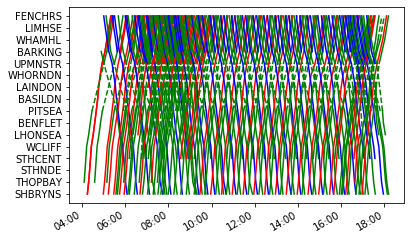

In [13]:
Headcodes=['2B51','2B50','2D01','2R51','2D00','2D03','2B53','2D02','2D05','2B55']
#Headcodes=['2B51','2D00']
Headcodes=Uniqueheadcodes[0:350]
#Colours=['r','b','g','r','g','g','r','g','g','r']
Graphdatacombo=Train_timings(Df,Headcodes[0])
for i in range(1,len(Headcodes)):
    Graphdata=Train_timings(Df,Headcodes[i])
    Graphdatacombo=Graphdatacombo=pd.merge(Graphdatacombo,Graphdata,on='TIPLOC',how='outer')
Graphdatacombo=Graphdatacombo.reset_index()
plt.plot(Graphdatacombo[Headcodes[0]],Graphdatacombo['TIPLOC'],Direction['Colour'][0])#Colours[0])
for j in range(0,len(Headcodes)):
    graphchunks=null_ranges(Graphdatacombo[Headcodes[j]])
    if len(graphchunks)==1:
        plt.plot(Graphdatacombo[Headcodes[j]].iloc[graphchunks[0][0]:graphchunks[0][1]+1],Graphdatacombo['TIPLOC'].iloc[graphchunks[0][0]:graphchunks[0][1]+1],Direction['Colour'][j])
    else:
        a=0
        for i in range(0,len(graphchunks)):
            plt.plot(Graphdatacombo[Headcodes[j]].iloc[graphchunks[i][0]:graphchunks[i][1]+1],Graphdatacombo['TIPLOC'].iloc[graphchunks[i][0]:graphchunks[i][1]+1],'g')
        for k in range(0,len(graphchunks)-1):
            plt.plot(Graphdatacombo[Headcodes[j]].iloc[graphchunks[k][1]:graphchunks[k][1]+1].append(Graphdatacombo[Headcodes[j]].iloc[graphchunks[k+1][0]:graphchunks[k+1][0]+1]),Graphdatacombo['TIPLOC'].iloc[graphchunks[k][1]:graphchunks[k][1]+1].append(Graphdatacombo['TIPLOC'].iloc[graphchunks[k+1][0]:graphchunks[k+1][0]+1]),'g--')
plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
plt.gca().xaxis.set_major_formatter(myFmt)
Graphdatacombo

In [14]:
Uniqueheadcodes[0]

'2B51'

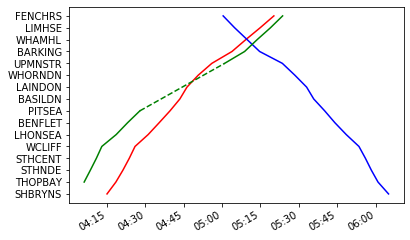

In [15]:
plt.plot(Graphdatacombo['2B51'],Graphdatacombo['TIPLOC'],'r')
plt.plot(Graphdatacombo['2B50'],Graphdatacombo['TIPLOC'],'b')
plt.plot(Graphdatacombo['2D01'].iloc[11:16],Graphdatacombo['TIPLOC'].iloc[11:16],'g')
plt.plot(Graphdatacombo['2D01'].iloc[1:8],Graphdatacombo['TIPLOC'].iloc[1:8],'g')
plt.plot(Graphdatacombo['2D01'].iloc[7:8].append(Graphdatacombo['2D01'].iloc[11:12]),Graphdatacombo['TIPLOC'].iloc[7:8].append(Graphdatacombo['TIPLOC'].iloc[11:12]),'g--')
#plt.xticks(Timearray)
plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
plt.gca().xaxis.set_major_formatter(myFmt)
plt.show()

In [16]:
#SchedTime=[]
#for i in range(0,len(TIPLOCs)):
#    for j in range(0,len(Train)):
#        if Train['TIPLOC'][j]==TIPLOCs[i]:
#            #SchedTime=SchedTime+[str(Train['Sched'][j])]
#            SchedTime=SchedTime+[Train['Sched'][j]]
#            break
#SchedTime

In [17]:
#Graphdata=pd.DataFrame()
#Graphdata['TIPLOC']=TIPLOCs
#Graphdata['Time']=Time
#Graphdata['SchedTime']=SchedTime
#for i in range(0,len(Graphdata)):
#    Graphdata.at[i,'SchedTime']=str(Graphdata['SchedTime'][i])[11:13]+str(Graphdata['SchedTime'][i])[14:16]+str(Graphdata['SchedTime'][i])[17:19]
#    Graphdata.at[i,'Time']=str(Graphdata['Time'][i])[11:13]+str(Graphdata['Time'][i])[14:16]+str(Graphdata['Time'][i])[17:19]
#Graphdata['Time']=pd.to_numeric(Graphdata['Time'])
#Graphdata['SchedTime']=pd.to_numeric(Graphdata['SchedTime'])
#Graphdata

In [18]:
Timearray=[]
Alttimearray=[]
a=pd.to_datetime('20191001040000',format='%Y%m%d%H%M%S')
for i in range(0,9):
    Timearray.append(a)
    a=a+timedelta(minutes=10)
#for i in range(0,len(Timearray)):
#    b=str(Timearray[i])[11:13]+str(Timearray[i])[14:16]+str(Timearray[i])[17:19]
#    Alttimearray.append(b)
Timearray

[Timestamp('2019-10-01 04:00:00'),
 Timestamp('2019-10-01 04:10:00'),
 Timestamp('2019-10-01 04:20:00'),
 Timestamp('2019-10-01 04:30:00'),
 Timestamp('2019-10-01 04:40:00'),
 Timestamp('2019-10-01 04:50:00'),
 Timestamp('2019-10-01 05:00:00'),
 Timestamp('2019-10-01 05:10:00'),
 Timestamp('2019-10-01 05:20:00')]

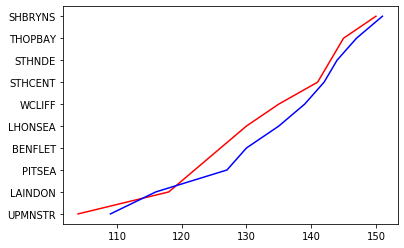

In [19]:
TIPLOCs=['UPMNSTR','LAINDON','PITSEA','BENFLET','LHONSEA','WCLIFF','STHCENT','STHNDE','THOPBAY','SHBRYNS']
#'FENCHRS','LIMHSE','WHAMHL','BARKING','UPMNSTR','LAINDON','BASILDN'
Time=[104,118,122,126,130,135,141,143,145,150]
SchedTime=[109,116,127,130,135,139,142,144,147,151]
plt.plot(Time,TIPLOCs,'r')
plt.plot(SchedTime,TIPLOCs,'b')
plt.show()